In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab #Imports matplotlib and a host of other useful modules
import pickle
import time

import sys
# sys.path.append("./")
import motion_planner as mp
from motion_planner import StateP

In [2]:
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')
logging.info('Logging enabled in notebook')


11:54:48 INFO:Logging enabled in notebook


# Drawings of the robot and playing field

## Airship and other obstacles

Plotted 835/835 


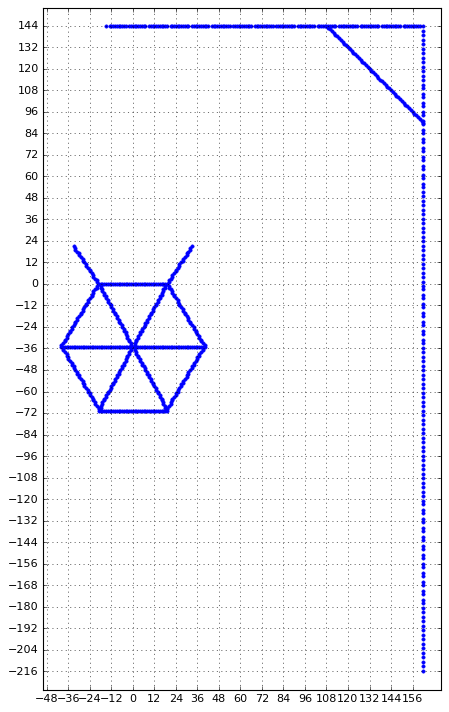

In [101]:
#   Draws the obstacles used in planning.
#   Draws only the half of the field that will actually be explored, 
#   This is flipped over to obtain the other side using reflective symmetry along vertical axis.
mp = reload(mp)
mp.plot_xy(mp.xy_obstacles_set(), figsize=11, 
           xlim=(-50,mp.UPPER_XLIMIT+10), 
           ylim=(-1.5*mp.UPPER_YLIMIT-10,mp.UPPER_YLIMIT+10), 
           grid=True)

Plotted 1001/1178 


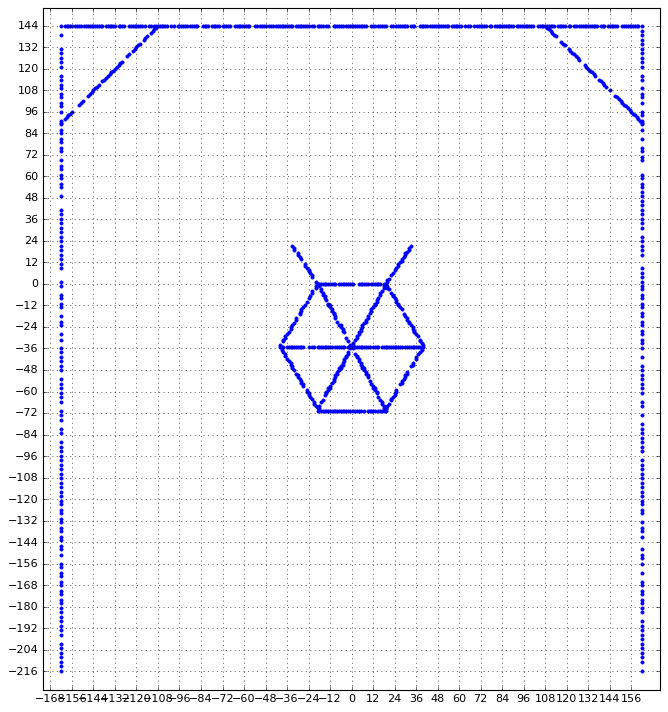

In [3]:
#   Shows what the entire gear-placing portion of the playing field looks like 
#   when reflected vertically to the west half of the playing field.
obstacles = mp.xy_obstacles_set()
for p in set(obstacles):
    obstacles.add((-p[0],p[1])) # reflect vertically
mp.plot_xy(obstacles, figsize=11, 
           xlim=(-mp.UPPER_XLIMIT-10,mp.UPPER_XLIMIT+10), 
           ylim=(-1.5*mp.UPPER_YLIMIT-10,mp.UPPER_YLIMIT+10),
           grid=True)

In [4]:
mp=reload(mp)
print mp.N_XY_GOALS
print mp.NE_XY_GOALS
print mp.N_GOAL_HEADINGS
print mp.NE_GOAL_HEADINGS

[(0, 20), (1, 20), (-1, 20)]
[(46, -8), (45, -7), (46, -9)]
[0, 354, 6, 350, 10, 346, 14]
[300, 294, 306, 290, 310, 286, 314]


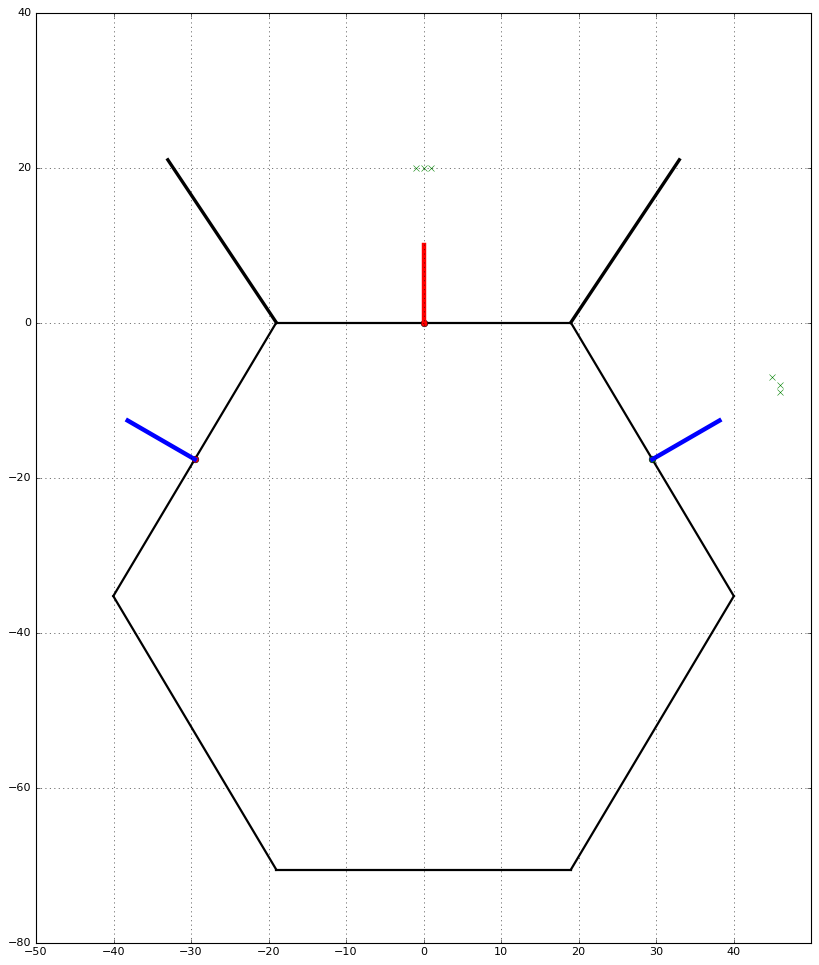

In [5]:
#   Draws overhead view of airship 
mp = reload(mp)
mp.plot_airship()
#   The red line is the north goal peg
#   The blue lines are the northwest and northeast pegs

plot_bot radii     : [35, 40, 5000, 45, 50, 55, 60, 65, 70] (inch)
plot_obt curvatures: 0.029,0.025,0.000,0.022,0.020,0.018,0.017,0.015,0.014 
heading: 206
center:  (137.50147414589742, 18.913036780099461)
nose from center:  (130.0, 35.0)


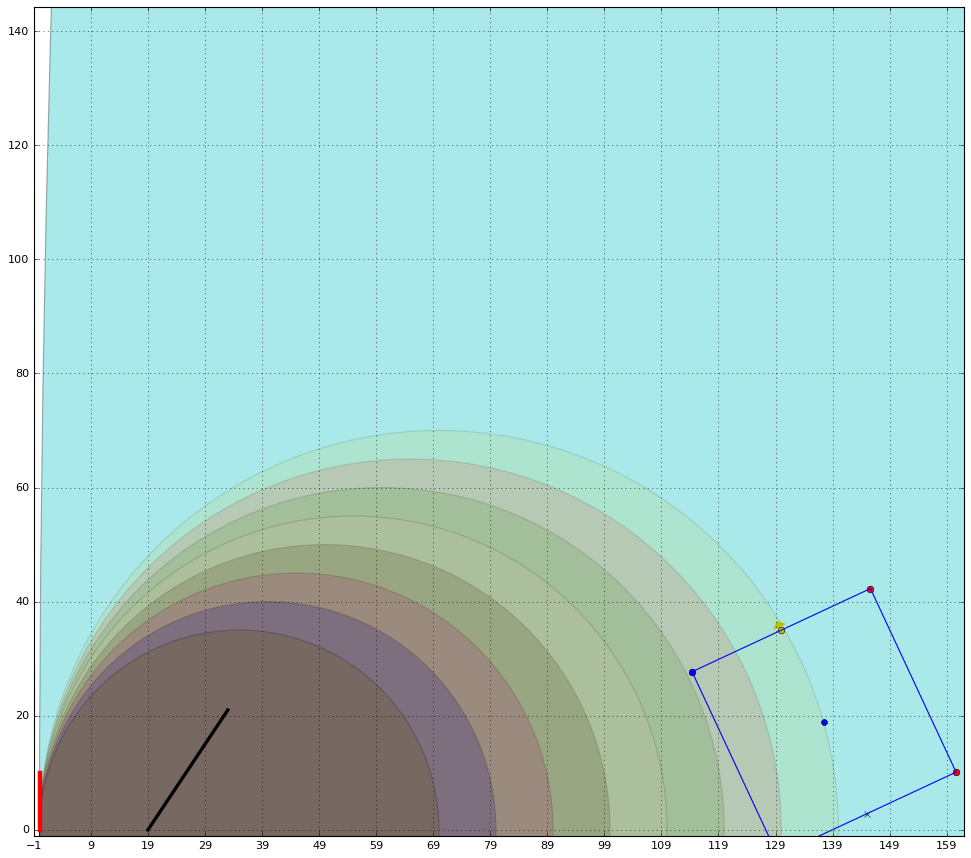

In [31]:
mp.plot_bot((130,35),theta=np.radians(205))


plot_bot radii     : [35, 40, 5000, 45, 50, 55, 60, 65, 70] (inch)
plot_obt curvatures: 0.029,0.025,0.000,0.022,0.020,0.018,0.017,0.015,0.014 
heading: 0
center:  (0.0, 17.75)
nose from center:  (0.0, 0.0)


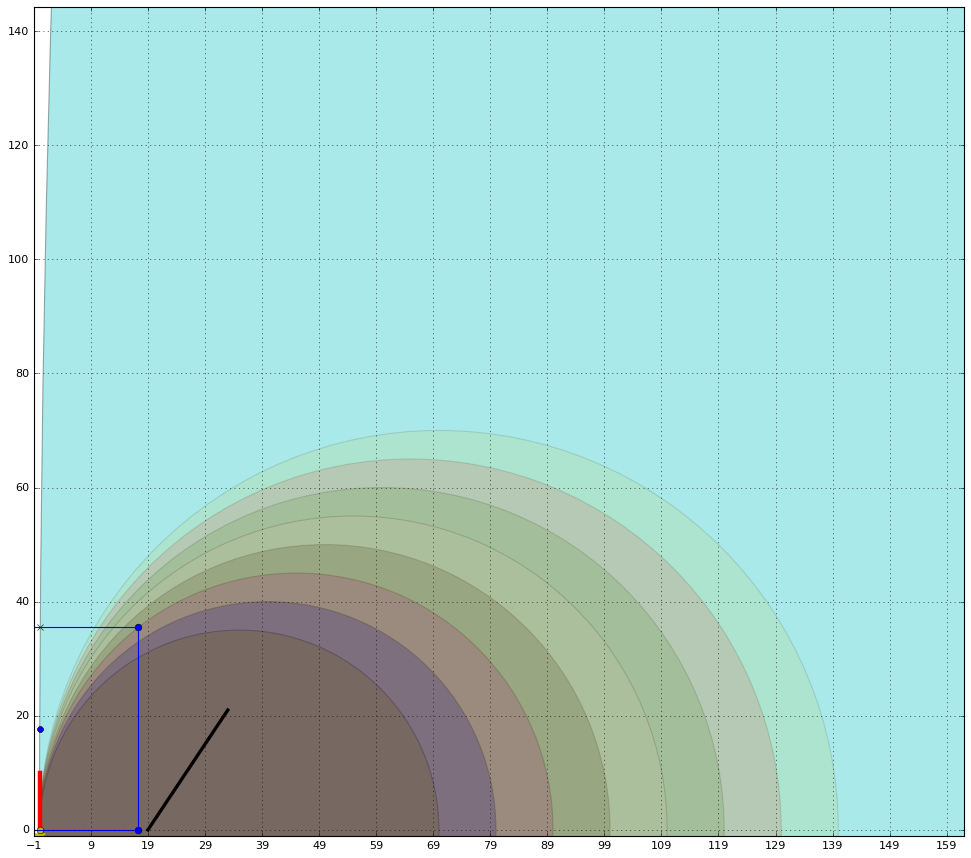

In [24]:
mp.plot_bot((0,0),theta=0)


plot_bot radii     : [35, 40, 5000, 45, 50, 55, 60, 65, 70] (inch)
plot_obt curvatures: 0.029,0.025,0.000,0.022,0.020,0.018,0.017,0.015,0.014 
heading: 270
center:  (59.0, 40.0)
nose from center:  (41.25, 40.0)


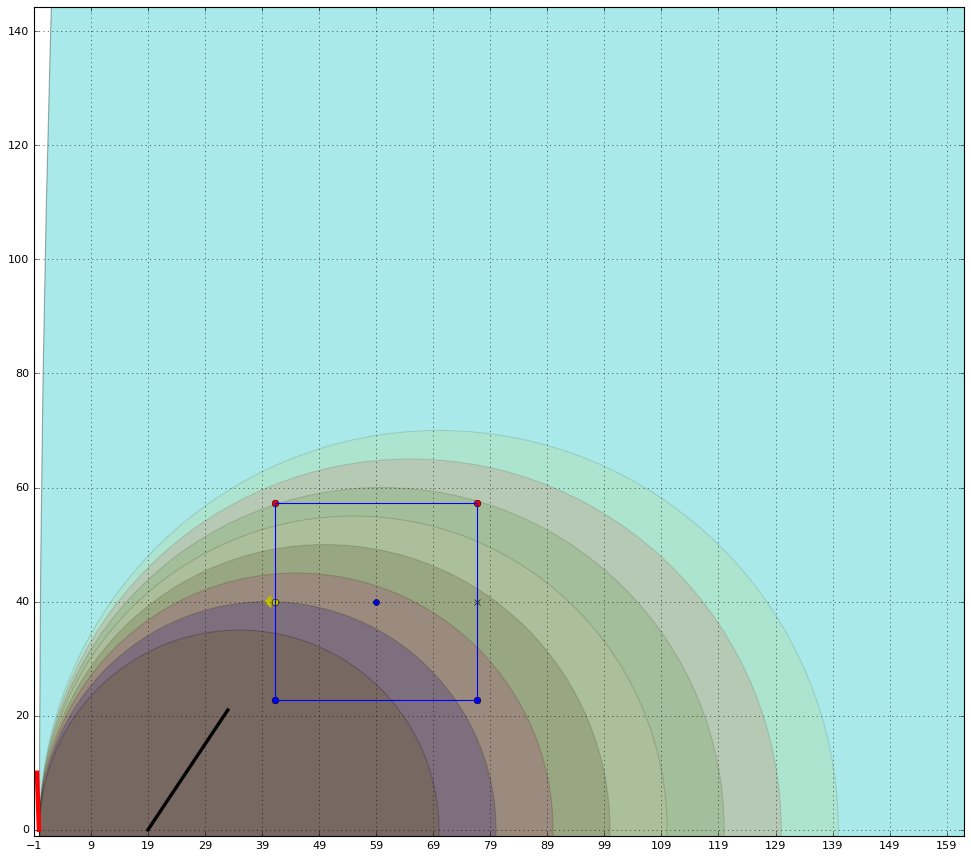

In [57]:
#mp = reload(mp)

# Places center exactly on gridline intersection
mp.plot_bot((59-mp.LL/2,40), theta=-np.pi/2) 

#mp.plot_bot((40,40), arc_center = (40,0))

### Drawing above depicts robot near the lift nearest alliance wall. 
#### North faces alliance wall. The drawing depicts only the rightmost (eastern) half of field.  
Red line (0,0) to (0,9) is peg. 
Blue square is robot. 
Black diagonal is divider.

Configuration space is 6.5' x 13.5'. Vehicle 34.5" x 34.8".
Number of one inch cells: 12,636.  
Using 60 angles per circle gives total number of configurations = 758,160

Downward direction (south) is zero angle. Angles increase counterclockwisely.
Examples: pi/2 faces right, -pi/2 faces left, -pi faces up.

The motion planning algorithm uses degrees instead of radians for easier discretization.

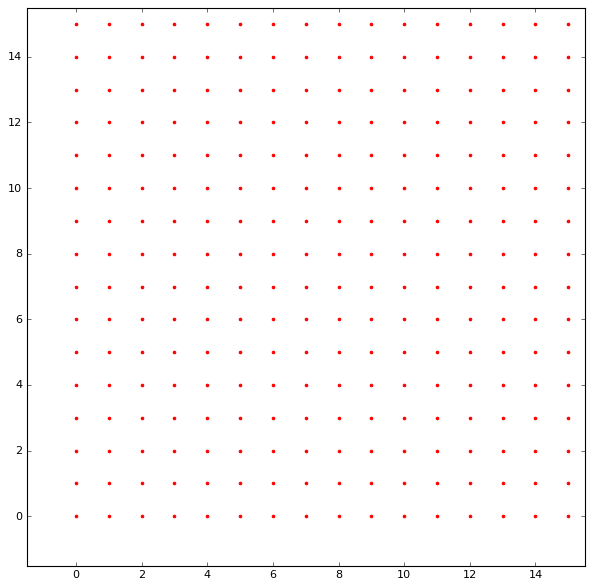

In [5]:
#
#  Plots a field of red dots!  Yay? 
#
#  For each item in X and Y
#  - Number of rows is 12*H + 1, where H is playing field height.
#  - Number of columns (size of each vector element) is 12*W + 1, where H is playing field height.

import itertools
x = np.linspace(0, mp.UPPER_XLIMIT, mp.UPPER_XLIMIT+1)
y = np.linspace(0, mp.UPPER_YLIMIT, mp.UPPER_YLIMIT+1)

plt.figure(figsize=(9,9))
ax = pylab.axes(aspect=1) 
plt.scatter(*zip(*itertools.product(x, y)), marker='o', s=5, color='red') # shows grid points
ax.set_xlim(-1.5, 15.5)
ax.set_ylim(-1.5, 15.5)

X, Y = np.meshgrid(x, y)



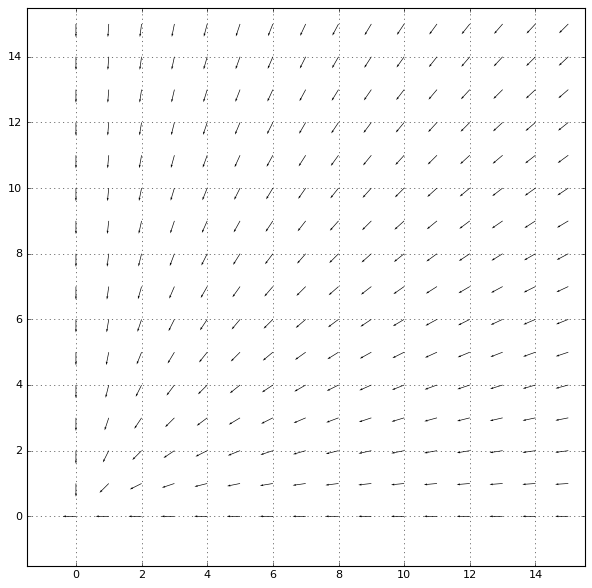

In [6]:
#
# Demonstrates a flow path grid
#
# Assumes X and Y already setup
#
# I considered using flow path based approach but the lookup table size is too big 
# for car-like robot having 360 possible headings.
#
# The other issue here is that while this is suitable for point like objects or
# vehicles with unicycle like properties, like a swerve drive, say,
# it doesn't handle the objective of bringing the robot into the peg at a 
# heading that facilitates gear placement onto peg.

deg = np.zeros_like(X) + -np.pi/2
deg = (np.ones_like(X) * np.arctan2(Y,X)) + np.pi

plt.figure(figsize=(9,9))
ax = pylab.axes(aspect=1)

QP = plt.quiver(X, Y, np.cos(deg), np.sin(deg), units='xy', scale=2.5, minshaft=4, minlength=3)
plt.grid()

ax.set_xlim(-1.5, 15.5)
ax.set_ylim(-1.5, 15.5)
plt.show()


Plotted 212/212 


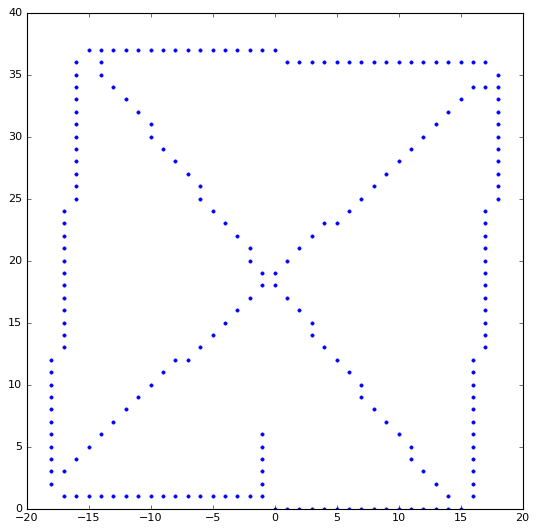

In [39]:
# Draws discretized outline of robot very near to lift showing 
# how it collides with airship when its heading is rotated by 4 degrees.
# Demonstrates how discretization affects the outline that the planning algorithm sees.
outline = mp.get_robot_xy_outline((0,19), np.radians(356),hood=True)
mp.plot_xy(outline)


# Visual collision checker


x,y,t: (6,26,296) 
Plotted 1001/1282 


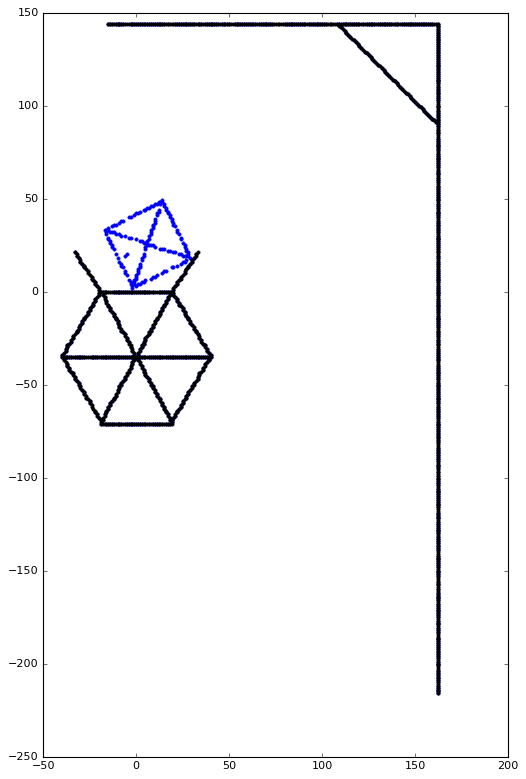

Clear


In [334]:
#mp.plot_check_collision((52,8),12,degrees=True,verbose=True)
#mp.plot_check_collision((53,12),18,degrees=True,verbose=True)
#mp.plot_check_collision((54,15),19,degrees=True,verbose=True)
#mp.plot_check_collision((53,24),34,degrees=True,verbose=True)
#mp.plot_check_collision((52,26),23.5,degrees=True,verbose=True)
#mp.plot_check_collision((48,32),52,degrees=True,verbose=True)
#mp.plot_check_collision((45,35),62,degrees=True,verbose=True)
#mp.plot_check_collision((42,37),70,degrees=True,verbose=True)
#mp.plot_check_collision((38,39),78,degrees=True,verbose=True)
#mp.plot_check_collision((7,23),26.5,degrees=True,verbose=True)
#mp.plot_check_collision((6,22),166,degrees=True,verbose=True)
#mp.plot_check_collision((9,124),350,degrees=True,verbose=True)
#mp.plot_check_collision((112,107),256,degrees=True,verbose=True)
#mp.plot_check_collision((99,119),270,degrees=True,verbose=True)
#mp.plot_check_collision((69,122),292,degrees=True,verbose=True)
#mp.plot_check_collision((138,-9),238,degrees=True,verbose=True)
#mp.plot_check_collision((138,-28),216,degrees=True,verbose=True)
#mp.plot_check_collision((-7,120),180,degrees=True,verbose=True)
#mp.plot_check_collision((125,-74),180,degrees=True,verbose=True)
#mp.plot_check_collision((43, 29), 302, degrees=True,verbose=True)
mp.plot_check_collision((6, 26), 296, degrees=True,verbose=True) # clear, but jammed

x,y,t: (33,21,270) 
Plotted 1001/1276 


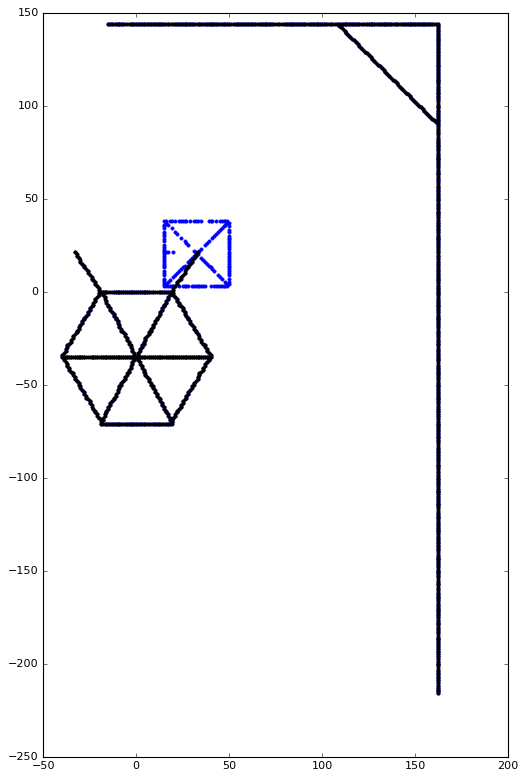

			===   COLLIDES   ===


In [3]:
#  Collision checker uses robot center.
#  Hererobot center is placed exactly at the tip of the northeast divider.
mp.plot_check_collision((mp.DIVIDER3[0][1],mp.DIVIDER3[1][1]),270,degrees=True)

x,y,t: (0,21,270) 
Plotted 1001/1276 


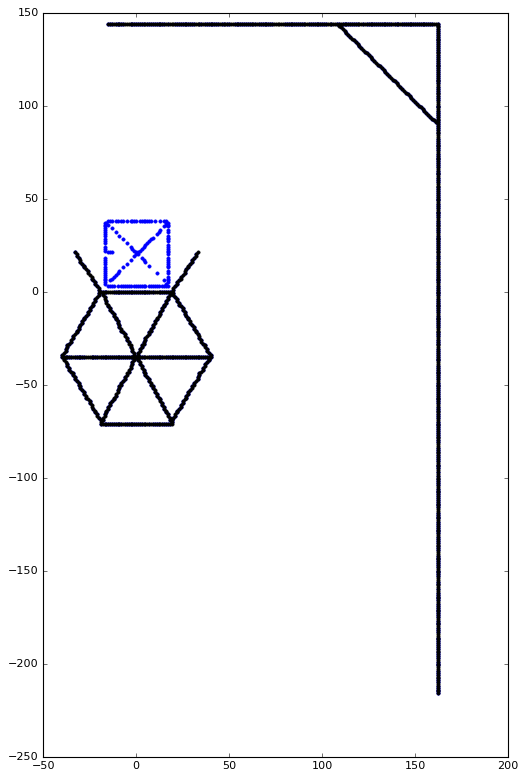

Clear


In [4]:
#  Here the robot is nestled in close to the north peg, 
#  which technically is a reachable state but is practically 
#  unlikely to be reached.
mp.plot_check_collision((0,21),270,degrees=True)

### Reading
#### Calculations for Robotics
http://rossum.sourceforge.net/papers/CalculationsForRobotics/CirclePath.htm

http://rossum.sourceforge.net/papers/CalculationsForRobotics/CubicPath.htm
    